# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [19]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

(<matplotlib.axes._subplots.AxesSubplot at 0x2e482197358>,
 Text(0.5,1,'Radius=7'))

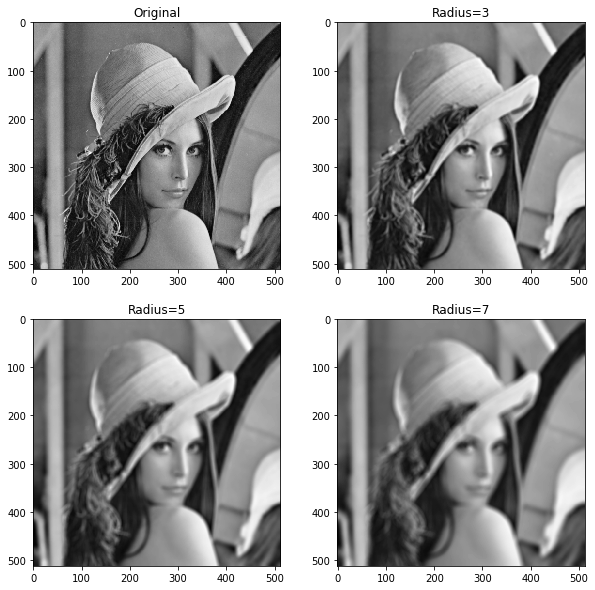

In [20]:
from skimage.filters.rank import mean
from skimage.morphology import disk

lena_im=io.imread('./images/lena-grey.bmp')
rad3=mean(lena_im,disk(3))
rad5=mean(lena_im,disk(5))
rad7=mean(lena_im,disk(7))

fig=plt.figure(figsize=(10,10))

plt.subplot(221),plt.imshow(lena_im,cmap=cm.gray),plt.title('Original')
plt.subplot(222),plt.imshow(rad3,cmap=cm.gray),plt.title('Radius=3')
plt.subplot(223),plt.imshow(rad5,cmap=cm.gray),plt.title('Radius=5')
plt.subplot(224),plt.imshow(rad7,cmap=cm.gray),plt.title('Radius=7')


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

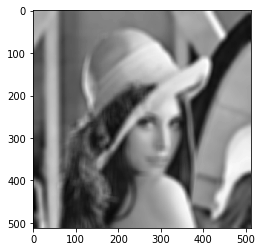

In [21]:
from scipy import ndimage
lena_im=io.imread('./images/lena-grey.bmp')
#create the mean filter

mask_mean=np.ones((14,14), dtype=float)

#normalize the mask
mask_mean/=np.sum(np.sum(mask_mean))

#compute the conlution
lena_mean= ndimage.filters.convolve(lena_im, mask_mean)

#plt,imshow resclale the image between
plt.figure()
plt.imshow(lena_mean,cmap=cm.gray),plt.title('')
plt.show()

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [22]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

Text(0.5,1,'Scharr edge detector')

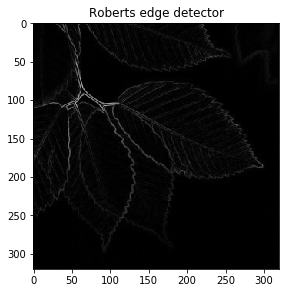

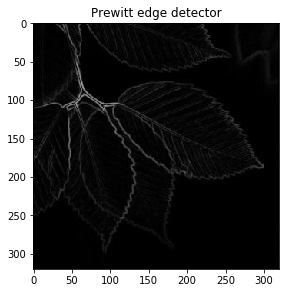

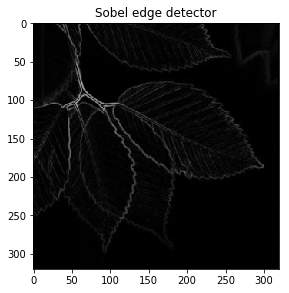

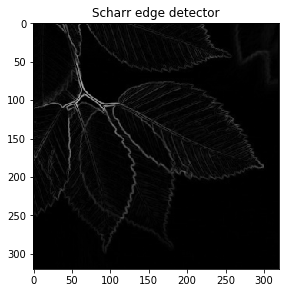

In [23]:
Path = './images/'
leaves = io.imread(Path.__add__('leaves.jpg'))
leaves = img_as_float(leaves)
leaves_gray = color.rgb2gray(leaves)


roberts_r= filters.roberts(leaves_gray)
prewitt_p= filters.prewitt(leaves_gray)
sobel_s= filters.sobel(leaves_gray)
scharr_s= filters.scharr(leaves_gray)

plt.figure()
io.imshow(roberts_r)
plt.title('Roberts edge detector')

plt.figure()
io.imshow(prewitt_p)
plt.title('Prewitt edge detector')

plt.figure()
io.imshow(sobel_s)
plt.title('Sobel edge detector')

plt.figure()
io.imshow(scharr_s)
plt.title('Scharr edge detector')

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

Text(0.5,1,'Second-order edge detector')

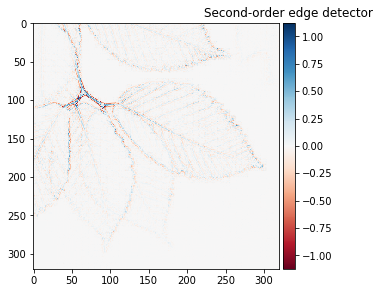

In [24]:
leaves_secondorder = ndimage.filters.laplace(leaves_gray)
plt.figure
io.imshow(leaves_secondorder)
plt.title('Second-order edge detector')

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [25]:
from skimage import util

Text(0.5,1,'Speckle noise')

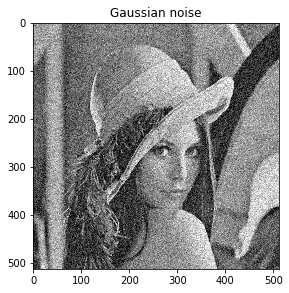

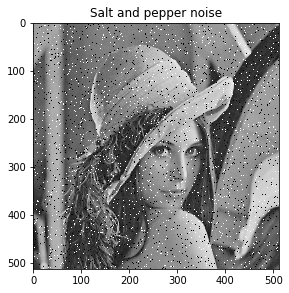

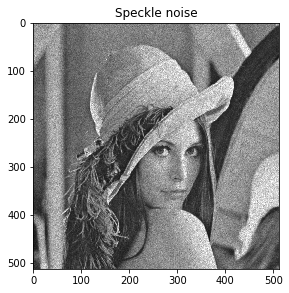

In [26]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

In [27]:
#Gaussian noise
lena_mean_g1 = filters.rank.mean(lena_gaussian, morphology.disk(1))
lena_mean_g3 = filters.rank.mean(lena_gaussian, morphology.disk(3))

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_g1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_g3)

#Salt and pepper noise
lena_mean_sp1 = filters.rank.mean(lena_sp, morphology.disk(1))
lena_mean_sp3 = filters.rank.mean(lena_sp, morphology.disk(3))

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_sp3)

#Speckle noise
lena_mean_sn1 = filters.rank.mean(lena_speckle, morphology.disk(1))
lena_mean_sn3 = filters.rank.mean(lena_speckle, morphology.disk(3))

plt.figure('c')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_mean_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_mean_sn3)

NameError: name 'morphology' is not defined

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

In [28]:
#Gaussian noise
lena_alpha_g1= filters.rank.mean_percentile(lena_gaussian, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_g3 = filters.rank.mean_percentile(lena_gaussian, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_g1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_g3)

#Salt and pepper noise
lena_alpha_sp1 = filters.rank.mean_percentile(lena_sp, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_sp3 = filters.rank.mean_percentile(lena_sp, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_sp3)

#Speckle noise
lena_alpha_sn1 = filters.rank.mean_percentile(lena_speckle, morphology.disk(1), p0=0.05, p1=0.95)
lena_alpha_sn3 = filters.rank.mean_percentile(lena_speckle, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure(3)
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_alpha_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_alpha_sn3)

NameError: name 'morphology' is not defined

** Q.7.3 median filter: **

In [29]:
#Gaussian noise
lena_median_g1 = filters.rank.median(lena_gaussian, morphology.disk(1))
lena_median_g3= filters.rank.median(lena_gaussian, morphology.disk(3))

plt.figure('a')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_g1)
plt.subplot(122)
plt.title('Disk = 3')
io.imshow(lena_median_g3)

#Salt and pepper noise
lena_median_sp1 = filters.rank.median(lena_sp, morphology.disk(1))
lena_median_sp3 = filters.rank.median(lena_sp, morphology.disk(3))

plt.figure('b')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_sp1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_median_sp3)

#Speckle noise
lena_median_sn1 = filters.rank.median(lena_speckle, morphology.disk(1))
lena_median_sn3 = filters.rank.median(lena_speckle, morphology.disk(3))

plt.figure('c')
plt.subplot(121)
plt.title('Disk 1')
io.imshow(lena_median_sn1)
plt.subplot(122)
plt.title('Disk 3')
io.imshow(lena_median_sn3)

NameError: name 'morphology' is not defined

## 4.4 Sharpening

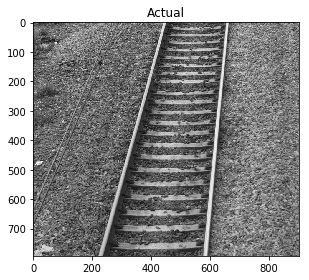

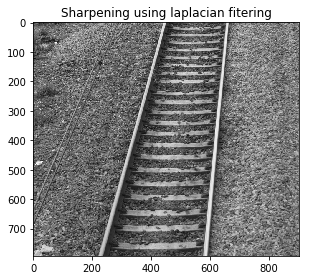

In [33]:
Path = './images/'

railway_image = io.imread(Path.__add__('railway.jpg'), as_grey=True)
plt.figure('a')
plt.title('Actual')
io.imshow(railway_image)


railway_laplace = ndimage.filters.laplace(railway_image)
plt.figure('b')
plt.title('Sharpening using laplacian fitering')
io.imshow(railway_image)

In [34]:
def HoughTransform(x):
    
    Lines = transform.probabilistic_hough_line(edges, line_length=5, line_gap=3)
    Edges = feature.canny(x, 4)    
    plt.figure
    io.imshow(x)
    plt.title('Lines Detected')
    
    for i in range(0, len(Lines)-1):
        x1 = Lines[i][0][0]
        y1 = Lines[i][0][1]
        x2 = Lines[i][1][0]
        y2 = Lines[i][1][1]
        plt.plot([x1, x2], [y1, y2], '-r')
        
    plt.show()
    
    return lines